In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
# Importando algumas libs importantes para o processo

import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier


In [160]:
from zipfile import ZipFile
zip_file = ZipFile('/content/drive/MyDrive/IA/titanic.zip')

data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

Os três próximos blocos são destinados à visão de forma geral dos dados e como parte deles estão distribuídos.

In [161]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
# Gráfico com dados iniciais - Para melhor compreensão

# fig, (axis1, axis2, axis3, axis4) = plt.subplots(1,4, figsize=(18,4))

# sns.barplot(x='Sex', y='Survived', data=data_train, ax=axis1, palette="Blues")
# sns.barplot(x='Pclass', y='Survived', data=data_train, ax=axis2, palette="Blues")
# sns.barplot(x='Embarked', y='Survived', data=data_train, ax=axis3, palette="Blues")
# sns.barplot(x='Age', y='Survived', data=data_train, ax=axis4, palette="Blues")

In [163]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
# Apagando colunas que não foram usadas na lógica para melhor acurácia

data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [165]:
alldata = [data_train, data_test]

Aqui começa a moldagem dos dados de **Treinamento**

In [166]:
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [167]:
data_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'], dtype=object)

In [168]:
data_train.columns.values.shape

(8,)

In [169]:
data_train.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [170]:
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
# Verificando se havia bastante crianças para uma possível, e feita, generalização de idades

data_train.nsmallest(50, 'Age')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
803,1,3,male,0.42,0,1,8.5167,C
755,1,2,male,0.67,1,1,14.5000,S
469,1,3,female,0.75,2,1,19.2583,C
644,1,3,female,0.75,2,1,19.2583,C
78,1,2,male,0.83,0,2,29.0000,S
831,1,2,male,0.83,1,1,18.7500,S
305,1,1,male,0.92,1,2,151.5500,S
164,0,3,male,1.00,4,1,39.6875,S
172,1,3,female,1.00,1,1,11.1333,S
183,1,2,male,1.00,2,1,39.0000,S


In [172]:
data_train['Age'].isna().sum()

177

In [173]:
np.random.seed(0)

In [174]:
# Completando idades faltantes -  mantendo método do professor

# np.random.seed(0)
mean = data_train["Age"].mean()
std = data_train["Age"].std()
list_isna = data_train['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      print("Antes",line,data_train.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      print(rand_age)
      data_train.at[line,'Age']=rand_age
      print("Depois",line,data_train.iloc[line]["Age"])


Antes 5 nan
[27]
Depois 5 27.0
Antes 17 nan
[30]
Depois 17 30.0
Antes 19 nan
[36]
Depois 19 36.0
Antes 26 nan
[15]
Depois 26 15.0
Antes 28 nan
[18]
Depois 28 18.0
Antes 29 nan
[42]
Depois 29 42.0
Antes 31 nan
[18]
Depois 31 18.0
Antes 32 nan
[22]
Depois 32 22.0
Antes 36 nan
[24]
Depois 36 24.0
Antes 42 nan
[34]
Depois 42 34.0
Antes 45 nan
[36]
Depois 45 36.0
Antes 46 nan
[33]
Depois 46 33.0
Antes 47 nan
[19]
Depois 47 19.0
Antes 48 nan
[38]
Depois 48 38.0
Antes 55 nan
[21]
Depois 55 21.0
Antes 64 nan
[39]
Depois 64 39.0
Antes 65 nan
[39]
Depois 65 39.0
Antes 76 nan
[27]
Depois 76 27.0
Antes 77 nan
[41]
Depois 77 41.0
Antes 82 nan
[16]
Depois 82 16.0
Antes 87 nan
[21]
Depois 87 21.0
Antes 95 nan
[22]
Depois 95 22.0
Antes 101 nan
[38]
Depois 101 38.0
Antes 107 nan
[29]
Depois 107 29.0
Antes 109 nan
[39]
Depois 109 39.0
Antes 121 nan
[32]
Depois 121 32.0
Antes 126 nan
[20]
Depois 126 20.0
Antes 128 nan
[40]
Depois 128 40.0
Antes 140 nan
[28]
Depois 140 28.0
Antes 154 nan
[23]
Depois 154 2

In [175]:
data_train['Age'].isna().sum()

0

In [176]:
data_train["Age"] = data_train["Age"].astype(int)

In [177]:
sorted_ages = sorted(data_train['Age'])
interval_size = len(sorted_ages) // 3

# Pegando as idades médias de cada um dos 3 intervalos divididos
sum1 = sum2 = sum3 = 0

for i, age in enumerate(sorted_ages):
  if i <= interval_size:
    sum1 += age
  elif interval_size < i <= (2*interval_size):
    sum2 += age
  else:
    sum3 += age

med1 = sum1/interval_size
med2 = sum2/interval_size
med3 = sum3/interval_size

# Checando intervalos de idade e generalizando
range1 = range2 = range3 = 0

if int(med1) < 15 and int(med2) < 35 and int(med3) < 60:
  range1 = 10
  range2 = 25
  range3 = 40
elif int(med1) < 15 and int(med3) > 60:
  range1 = 10
  range2 = 40
  range3 = 70
elif int(med1) > 50 and int(med3) > 90:
  range1 = 60
  range2 = 85
  range3 = 95

# Atribuindo as idades generalizadas
cont = -1

for age in data_train['Age']:
  cont += 1
  if age <= med1:
    data_train.at[cont, 'Age'] = range1
  elif med1 < age <= med2:
    data_train.at[cont, 'Age'] = range2
  else:
    data_train.at[cont, 'Age'] = range3


In [178]:
data_train['Age'].head()

0    0
1    0
2    0
3    0
4    0
Name: Age, dtype: int64

In [179]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [180]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [181]:
data_train['Embarked'].isna().sum()

2

In [182]:
no_value = data_train[data_train['Embarked'].isnull()]

print(no_value)

     Survived  Pclass     Sex  Age  SibSp  Parch  Fare Embarked
61          1       1  female    0      0      0  80.0      NaN
829         1       1  female    0      0      0  80.0      NaN


In [183]:
data_train.at[61, 'Embarked'] = 'S'
data_train.at[829, 'Embarked'] = 'S'

In [184]:
data_train['Embarked'].isna().sum()

0

In [185]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [186]:
for dataset in alldata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [187]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [188]:
# Tentativa 2 - Verificando o sexo e quanto a pessoa pagou de taxa, em escala de 1 a 5

#for dataset in alldata:
#  for index, data in dataset.iterrows():
#    if data['Fare'] >= 31 and data['Sex'] == 1:
#      dataset.at[index, 'Fare'] = 1
#    elif ((data['Fare'] >= 31) and (data['Sex'] == 0)):
#      dataset.at[index, 'Fare'] = 2
#    elif ((7 <= data['Fare'] <= 30) and (data['Sex'] == 1)):
#      dataset.at[index, 'Fare'] = 3
#    elif ((7 <= data['Fare'] <= 31) and (data['Sex'] == 0)):
#      dataset.at[index, 'Fare'] = 4
#    else:
#      dataset.at[index, 'Fare'] = 5

#rich_woman = (data_train['Fare'] == 1).sum()
#rich_man = (data_train['Fare'] == 2).sum()
#normal_woman = (data_train['Fare'] == 3).sum()
#normal_man = (data_train['Fare'] == 4).sum()
#poor = (data_train['Fare'] == 5).sum()

#print(f"rich w {rich_woman}\nrich m {rich_man}\nnormal w {normal_woman}\nnormal m {normal_man}\npoor {poor}")

In [189]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0,1,0,7,0
1,1,1,1,0,1,0,71,1
2,1,3,1,0,0,0,7,0
3,1,1,1,0,1,0,53,0
4,0,3,0,0,0,0,8,0


Agora, os dados do **Teste** propriamente dito

In [190]:
data_test['Age'].isna().sum()

86

In [191]:
# Completando idades faltantes

# np.random.seed(0)
mean = data_test["Age"].mean()
std = data_test["Age"].std()
list_isna = data_test['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      print("Antes",line,data_test.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      print(rand_age)
      data_test.at[line,'Age']=rand_age
      print("Depois",line,data_test.iloc[line]["Age"])

Antes 10 nan
[30]
Depois 10 30.0
Antes 22 nan
[26]
Depois 22 26.0
Antes 29 nan
[35]
Depois 29 35.0
Antes 33 nan
[40]
Depois 33 40.0
Antes 36 nan
[24]
Depois 36 24.0
Antes 39 nan
[29]
Depois 39 29.0
Antes 41 nan
[40]
Depois 41 40.0
Antes 47 nan
[18]
Depois 47 18.0
Antes 54 nan
[19]
Depois 54 19.0
Antes 58 nan
[18]
Depois 58 18.0
Antes 65 nan
[27]
Depois 65 27.0
Antes 76 nan
[29]
Depois 76 29.0
Antes 83 nan
[32]
Depois 83 32.0
Antes 84 nan
[24]
Depois 84 24.0
Antes 85 nan
[24]
Depois 85 24.0
Antes 88 nan
[35]
Depois 88 35.0
Antes 91 nan
[24]
Depois 91 24.0
Antes 93 nan
[42]
Depois 93 42.0
Antes 102 nan
[18]
Depois 102 18.0
Antes 107 nan
[40]
Depois 107 40.0
Antes 108 nan
[36]
Depois 108 36.0
Antes 111 nan
[19]
Depois 111 19.0
Antes 116 nan
[28]
Depois 116 28.0
Antes 121 nan
[30]
Depois 121 30.0
Antes 124 nan
[16]
Depois 124 16.0
Antes 127 nan
[20]
Depois 127 20.0
Antes 132 nan
[19]
Depois 132 19.0
Antes 133 nan
[29]
Depois 133 29.0
Antes 146 nan
[27]
Depois 146 27.0
Antes 148 nan
[38]
De

In [192]:
data_test['Age'].isna().sum()

0

In [193]:
data_test["Age"] = data_test["Age"].astype(int)

In [194]:
data_test['Age'].head()

0    34
1    47
2    62
3    27
4    22
Name: Age, dtype: int64

In [195]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7,2
1,3,1,47,1,0,7,0
2,2,0,62,0,0,9,2
3,3,0,27,0,0,8,0
4,3,1,22,1,1,12,0


In [196]:
data_test.shape

(418, 7)

In [197]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [198]:
data_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


Início da preparação e construção das Árvores

In [199]:
!pip install sweetviz

In [200]:
import sweetviz as sv

my_report_train = sv.analyze(data_train)
my_report_train.show_html("/content/drive/MyDrive/IA/teste.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/IA/teste.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report_train.show_notebook()

In [202]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", random_state=0, splitter="best", max_depth=8, min_samples_split=10)

X = data_train.drop(['Survived'], axis=1).values
Y = data_train['Survived'].values

clf.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=0)

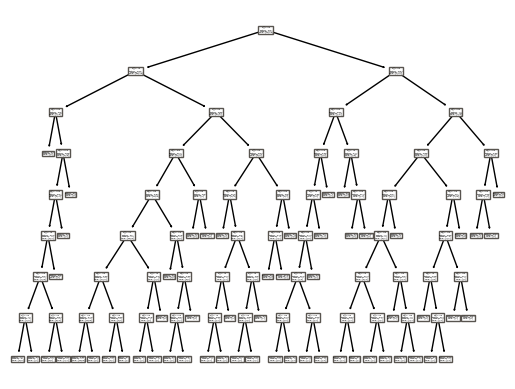

In [203]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [204]:
#https://mljar.com/blog/visualize-decision-tree/

In [205]:
attributes = data_train.columns.values.tolist()
del attributes[0]
print(attributes)

decisoes = np.unique(data_train['Survived'].values).tolist()
decisoes = map(str, decisoes)
decisoes = ['0','1']

# women_data = data_train[data_train['Sex'] == 1]
# women_survived = (women_data['Survived'].sum() / len(women_data)) * 100

# print(f"Mulheres sobreviventes: {women_survived:.2f}%")

# men_data = data_train[data_train['Sex'] == 0]
# men_survived = (men_data['Survived'].sum() / len(men_data)) * 100

# print(f"Homens sobreviventes: {men_survived:.2f}%")

# rich = data_train[data_train['Pclass'] <= 1]
# rich_survived = (rich['Survived'].sum() / len(rich)) * 100

# print(f"Ricos sobreviventes: {rich_survived:.2f}%")


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Mulheres sobreviventes: 74.20%
Homens sobreviventes: 18.89%
Ricos sobreviventes: 62.96%


In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=decisoes,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

In [207]:
X_test = data_test.values
Y_pred = clf.predict(X_test)

In [208]:
Y_test = data_gender['Survived'].values
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [209]:
qtd1 = np.count_nonzero(Y_test==1)
qtd0 = np.count_nonzero(Y_test==0)
print("Qtd 1: {}". format(qtd1))
print("Qtd 0: {}". format(qtd0))

Qtd 1: 152
Qtd 0: 266


In [210]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.9138755980861244

In [211]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, Y_pred)

0.9041353383458647

In [212]:
# Criação do gráfico comparativo das profundidades

# x = [2, 4, 00] # 00 == None
# y = [0.74, 0.84, 0.77]

# fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# sns.barplot(x=x, y=y, palette="Blues", ax=ax)

# ax.set_xlabel('Max_depth')
# ax.set_ylabel('Acurácia')

# plt.show()

In [213]:
data_train.drop(['Survived'], axis=1).values

array([[ 3,  0,  0, ...,  0,  7,  0],
       [ 1,  1,  0, ...,  0, 71,  1],
       [ 3,  1,  0, ...,  0,  7,  0],
       ...,
       [ 3,  1,  0, ...,  2, 23,  0],
       [ 1,  0,  0, ...,  0, 30,  1],
       [ 3,  0,  0, ...,  0,  7,  2]])

In [214]:
train = data_train['Survived'].values
print(train)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [215]:
qtd1 = np.count_nonzero(train==1)
qtd0 = np.count_nonzero(train==0)
print("Qtd 1: {}". format(qtd1))
print("Qtd 0: {}". format(qtd0))

Qtd 1: 342
Qtd 0: 549


In [216]:
aux = np.where(data_gender['Survived'].values==0)[0]
aux.shape

(266,)

In [217]:
data_gender.shape

(418, 2)

In [218]:
# discretizar meus dados (colocar em baldes/faixas)

#for dataset in alldata:
 #   dataset['Age'] = dataset['Age'].astype(int)
#    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
##    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
#    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
 #   dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
 #   dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
 #   dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
 #   dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
 #   dataset.loc[ dataset['Age'] > 66, 'Age'] = 6